In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
#sns.heatmap(tr.isnull(),yticklabels=False)

In [3]:
tr_num = pd.read_csv('data/train_num_p.csv')
tr_cat = pd.read_csv('data/train_cat_p.csv')

## Numeric features

In [4]:
tr_num.describe()

,id,budget,popularity,runtime,revenue,runtime_h,runtime_m,revenue_log,runtime_log,budget_log,popularity_log
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03,2998.000000,2998.000000,3000.000000,2998.000000,3000.000000,3.000000e+03
mean,1500.500000,2.266135e+07,8.463274,107.856571,6.668176e+07,1.240494,33.426951,15.972774,4.658456,11.961359,1.975396e+00
std,866.169729,3.702662e+07,12.104000,22.086434,1.375149e+08,0.466282,15.521343,3.035788,0.346679,7.403049,7.416869e-01
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00,0.000000,0.000000,0.693147,0.000000,0.000000,9.999995e-07
25%,750.750000,0.000000e+00,4.018053,94.000000,2.401550e+06,1.000000,25.000000,14.691625,4.553877,0.000000,1.613042e+00
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07,1.000000,36.000000,16.637310,4.653960,15.894952,2.125233e+00
75%,2250.250000,3.000000e+07,10.890983,118.000000,6.877599e+07,1.000000,45.000000,18.046365,4.779123,17.216708,2.475780e+00
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09,5.000000,59.000000,21.141685,5.826000,19.755682,5.688117e+00


C:\Users\jjone\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning:

invalid value encountered in greater

C:\Users\jjone\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning:

invalid value encountered in less

C:\Users\jjone\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



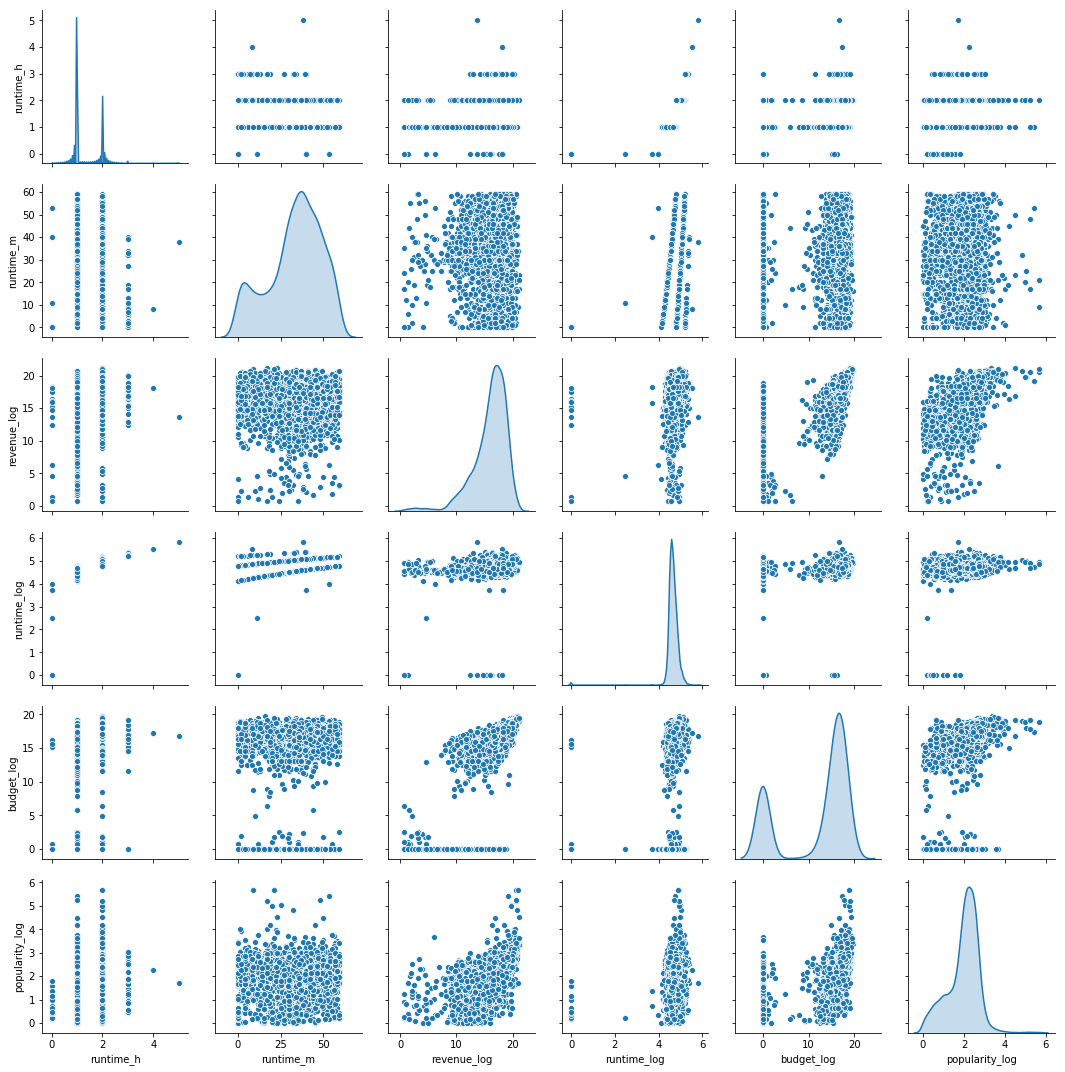

In [5]:
sns.pairplot(tr_num.iloc[:, 5:11], diag_kind = 'kde')

In [10]:
idx = tr_num[tr_num.runtime.isnull()].index
a = pd.read_csv('data/train.csv', usecols= ['title'])
a.iloc[idx]

,title
1335,Королёв
2302,Happy Weekend


In [11]:
tr_cat.release_date[2302]

'1996-03-14'

## Categorical features

### genres

In [69]:
tr_cat.columns

Index(['genres', 'original_language', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'spoken_languages',
       'status', 'is_collection', 'is_homepage', 'n_genres', 'n_prod_comp',
       'n_prod_count', 'n_spoken_lang', 'n_cast', 'crew_job', 'n_crew',
       'n_crew_job', 'year', 'month', 'day', 'weekofday', 'quarter'],
      dtype='object')

In [ ]:
te_cat = pd.read_csv('data/test_cat_p.csv')

In [7]:
tr_cat['revenue_log'] = np.log1p(tr_cat.revenue)

In [71]:
tr_cat['genres'] = tr_cat.genres.map(lambda row: row.split(';')[:-1])

In [9]:
tr_cat.sample(5)

,genres,original_language,production_companies,production_countries,release_date,revenue,spoken_languages,status,is_collection,is_homepage,...,n_cast,crew_job,n_crew,n_crew_job,year,month,day,weekofday,quarter,revenue_log
1474,"[Romance, Crime, Drama, Thriller]",en,Miramax Films;Channel Four Films;Palace Pictur...,JP;GB;IE;,1992-09-02,62548947.0,en;,Released,False,True,...,18,Original Music Composer;Production Design;Prod...,8,8,1992,9,2,2,3,17.951460
1983,"[Drama, Romance]",en,BBC Films;PolyGram Filmed Entertainment;Miramax;,GB;,1994-01-01,4176932.0,en;,Released,False,False,...,23,Director;Writer;Additional Soundtrack;Producer...,11,11,1994,1,1,5,1,15.245088
2476,"[Crime, Comedy, Adventure]",en,O Entertainment;Warner Bros.;Morgan Creek Prod...,US;,1995-11-10,212385533.0,en;,Released,True,False,...,15,Director;Characters;Screenplay;Executive Produ...,11,9,1995,11,10,4,4,19.173914
309,[Comedy],en,Walt Disney Pictures;Gunn Films;Casual Friday ...,US;,2003-08-03,110230332.0,zh;en;,Released,False,False,...,34,Screenplay;Screenplay;Producer;Original Music ...,29,24,2003,8,3,6,3,18.518083
964,"[Drama, War, History]",it,Igor Film;Casbah Film;,IT;DZ;,1966-09-08,921548.0,ar;en;fr;it;,Released,False,False,...,8,Writer;Original Music Composer;Executive Produ...,30,23,1966,9,8,3,3,13.733811


In [10]:
mlb = MultiLabelBinarizer()
X = mlb.fit_transform(tr_cat.genres).astype('int')
mlb.classes_

array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western'], dtype=object)

In [11]:
df_genres = pd.DataFrame(X, columns = mlb.classes_)

In [12]:
df_genres = pd.concat([df_genres, tr_cat.revenue_log], axis = 1)

In [13]:
df_genres.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,revenue_log
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16.326300
1,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,18.370959
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,16.387512
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,16.588099
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,15.182615


In [14]:
# Frequency per genres
df_genres.iloc[:, :-1].sum(axis = 0).sort_values()[::-1]

Drama              1535
Comedy             1030
Thriller            790
Action              742
Romance             573
Crime               469
Adventure           440
Horror              301
Science Fiction     290
Family              260
Fantasy             233
Mystery             226
Animation           141
History             132
Music               100
War                 100
Documentary          87
Western              43
Foreign              31
TV Movie              1
dtype: int64

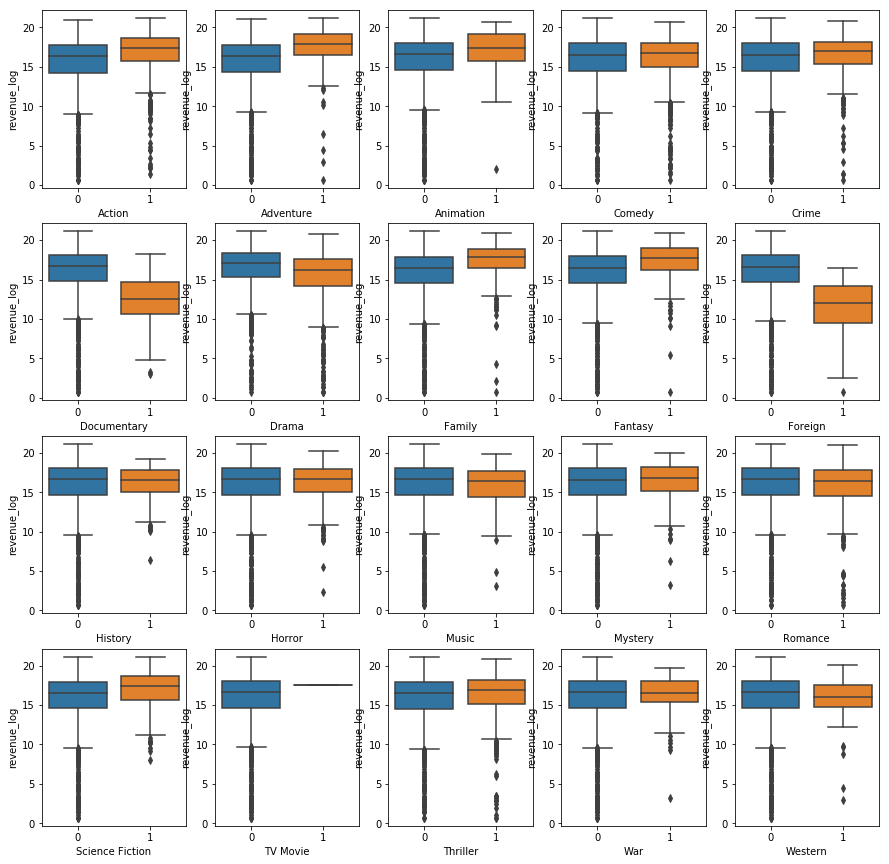

In [15]:
# Revernue distribution per genres 
plt.figure(figsize = (15, 15))
for i in range(len(df_genres.columns[:-1])):
    plt.subplot(4, 5, i+1)
    sns.boxplot(x = df_genres.iloc[:, i], y = df_genres.revenue_log)
plt.show()

In [16]:
# Mean encoding


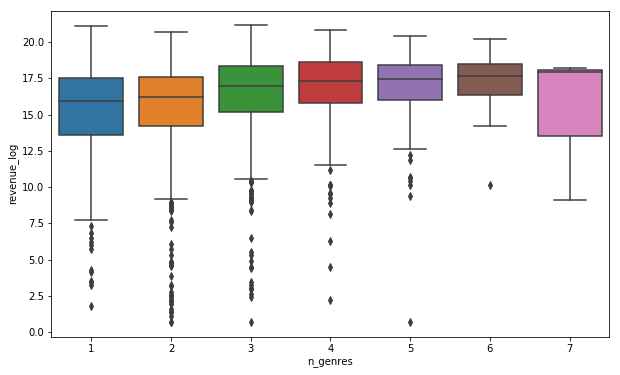

In [17]:
# Number of genres vs. Revenue
plt.figure(figsize = (10, 6))
sns.boxplot(x = tr_cat.n_genres, y = tr_cat.revenue_log)

In [18]:
tr_cat.groupby(tr_cat.n_genres)['revenue_log'].mean()

n_genres
1    15.258256
2    15.491729
3    16.397228
4    16.912266
5    16.763969
6    17.152661
7    15.088890
Name: revenue_log, dtype: float64

### production countries

In [19]:
tr_cat.head()

,genres,original_language,production_companies,production_countries,release_date,revenue,spoken_languages,status,is_collection,is_homepage,...,n_cast,crew_job,n_crew,n_crew_job,year,month,day,weekofday,quarter,revenue_log
0,[Comedy],en,Paramount Pictures;United Artists;Metro-Goldwy...,US;,2015-02-20,12314651.0,en;,Released,True,False,...,24,First Assistant Director;Director;Writer;Chara...,72,59,2015,2,20,4,1,16.326300
1,"[Comedy, Drama, Family, Romance]",en,Walt Disney Pictures;,US;,2004-08-06,95149435.0,en;,Released,True,False,...,20,Director;Director of Photography;Original Musi...,9,7,2004,8,6,4,3,18.370959
2,[Drama],en,Bold Films;Blumhouse Productions;Right of Way ...,US;,2014-10-10,13092000.0,en;,Released,False,True,...,51,Casting;Music Editor;Executive In Charge Of Pr...,64,46,2014,10,10,4,4,16.387512
3,"[Thriller, Drama]",hi,NaN,IN;,2012-03-09,16000000.0,en;hi;,Released,False,True,...,7,Director;Producer;Writer;,3,3,2012,3,9,4,1,16.588099
4,"[Action, Thriller]",ko,NaN,KR;,2009-02-05,3923970.0,ko;,Released,False,False,...,4,Director;Writer;,2,2,2009,2,5,3,1,15.182615


In [72]:
tr_cat['production_countries'] = tr_cat.production_countries.map(lambda row: row.split(';')[:-1])

In [21]:
mlb = MultiLabelBinarizer()
X = mlb.fit_transform(tr_cat.production_countries).astype('int')
mlb.classes_

array(['AE', 'AR', 'AT', 'AU', 'BA', 'BE', 'BF', 'BG', 'BR', 'BS', 'CA',
       'CH', 'CL', 'CN', 'CR', 'CS', 'CY', 'CZ', 'DE', 'DK', 'DZ', 'ES',
       'ET', 'FI', 'FR', 'GB', 'GH', 'GR', 'HK', 'HR', 'HU', 'ID', 'IE',
       'IL', 'IN', 'IR', 'IS', 'IT', 'JO', 'JP', 'KH', 'KR', 'LU', 'MA',
       'MN', 'MR', 'MT', 'MX', 'NA', 'NL', 'NO', 'NZ', 'PE', 'PH', 'PK',
       'PL', 'PR', 'PT', 'PY', 'QA', 'RO', 'RS', 'RU', 'SA', 'SE', 'SG',
       'SI', 'TH', 'TN', 'TR', 'TW', 'UA', 'US', 'UY', 'ZA'], dtype=object)

In [22]:
df_prod_count = pd.DataFrame(X, columns = mlb.classes_)
df_prod_count = pd.concat([df_prod_count, tr_cat.revenue_log], axis = 1)
df_prod_count.head()

,AE,AR,AT,AU,BA,BE,BF,BG,BR,BS,...,SI,TH,TN,TR,TW,UA,US,UY,ZA,revenue_log
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,16.326300
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,18.370959
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,16.387512
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16.588099
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15.182615


In [23]:
top20_count = df_prod_count.iloc[:, :-1].sum(axis = 0).sort_values()[::-1][:20].index
top20_count

Index(['US', 'GB', 'FR', 'DE', 'CA', 'IN', 'IT', 'AU', 'JP', 'RU', 'ES', 'CN',
       'HK', 'BE', 'IE', 'KR', 'MX', 'SE', 'NZ', 'NL'],
      dtype='object')

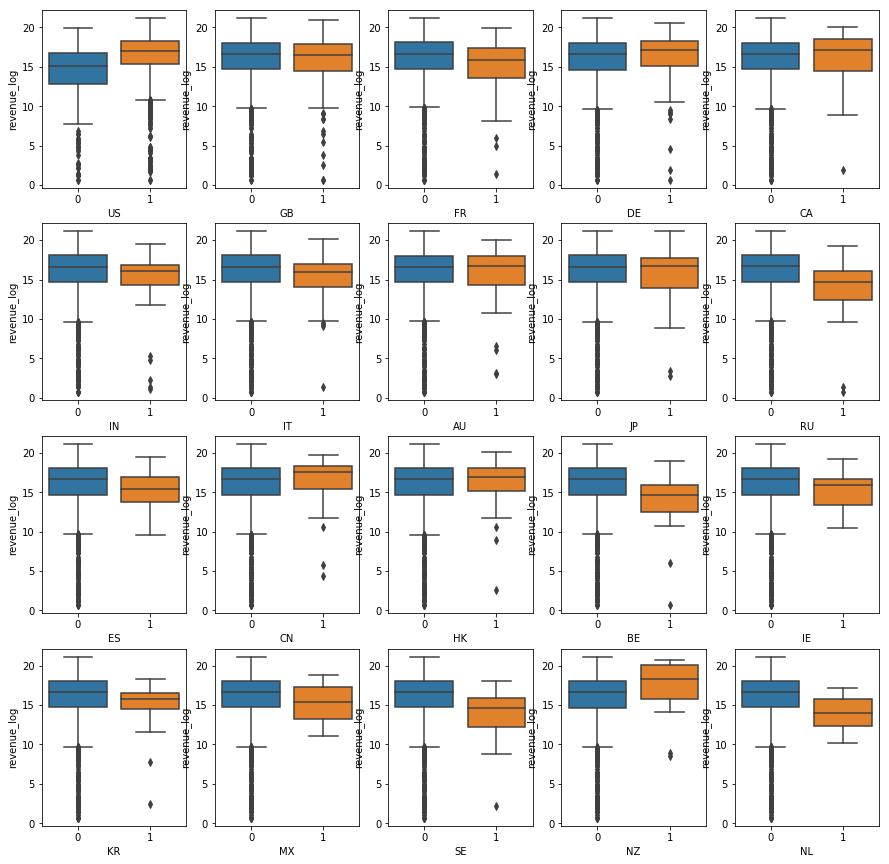

In [24]:
plt.figure(figsize = (15, 15))
for i in range(len(top20_count)):
    plt.subplot(4, 5, i+1)
    sns.boxplot(x = df_prod_count[top20_count[i]], y = df_prod_count.revenue_log,data = df_prod_count)

In [25]:
tr_cat.groupby(tr_cat.n_prod_count)['revenue_log'].median()

n_prod_count
1    16.606676
2    16.817093
3    16.498455
4    17.046435
5    16.119788
6    14.113946
8    16.634289
Name: revenue_log, dtype: float64

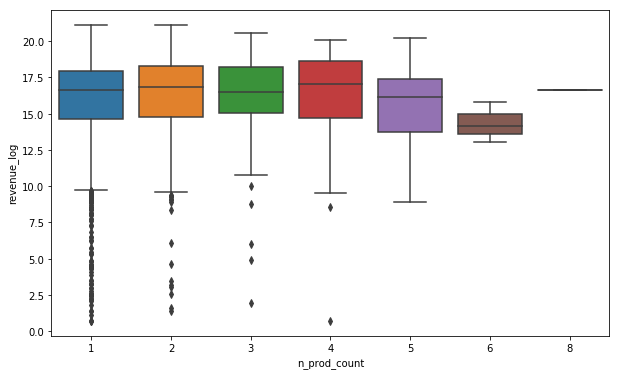

In [26]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = tr_cat.n_prod_count, y = tr_cat.revenue_log)

### original language & spoken langauge

In [27]:
print("spoken language min: {}, max: {}".format(tr_cat.n_spoken_lang.min(), tr_cat.n_spoken_lang.max()))

spoken language min: 1, max: 9


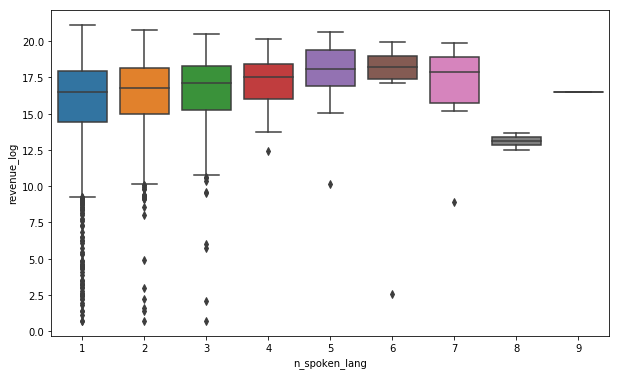

In [28]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = tr_cat.n_spoken_lang, y = tr_cat.revenue_log)

In [29]:
tr_cat.groupby(tr_cat.n_spoken_lang)['revenue_log'].mean()
# mean encoding???


n_spoken_lang
1    15.794581
2    16.175950
3    16.448364
4    17.235305
5    17.887769
6    15.870793
7    16.458253
8    13.098653
9    16.498231
Name: revenue_log, dtype: float64

In [30]:
tr_cat.spoken_languages.isnull().sum()

0

In [31]:
tr_cat['spoken_languages'] = tr_cat.spoken_languages.apply(lambda row: row.split(';'))

In [32]:
X = mlb.fit_transform(tr_cat.spoken_languages).astype('int')
mlb.classes_

array(['', 'af', 'am', 'ar', 'bg', 'bn', 'bo', 'ca', 'cn', 'cs', 'da',
       'de', 'el', 'en', 'eo', 'es', 'et', 'eu', 'fa', 'fi', 'fr', 'ga',
       'gd', 'gu', 'he', 'hi', 'hr', 'hu', 'hy', 'id', 'is', 'it', 'ja',
       'kk', 'km', 'ko', 'ku', 'kw', 'la', 'ln', 'lo', 'mi', 'ml', 'mr',
       'my', 'nl', 'no', 'nv', 'ny', 'pa', 'pl', 'ps', 'pt', 'qu', 'ro',
       'ru', 'sa', 'sh', 'si', 'sk', 'so', 'sq', 'sr', 'st', 'sv', 'sw',
       'ta', 'te', 'th', 'tl', 'tr', 'uk', 'ur', 'vi', 'wo', 'xh', 'xx',
       'yi', 'zh', 'zu'], dtype=object)

In [33]:
df_langs = pd.DataFrame(X, columns = mlb.classes_)
df_langs = pd.concat([df_langs.iloc[:, 1:], tr_cat.revenue_log], axis = 1)
df_langs.head()

,af,am,ar,bg,bn,bo,ca,cn,cs,da,...,uk,ur,vi,wo,xh,xx,yi,zh,zu,revenue_log
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16.326300
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18.370959
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16.387512
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16.588099
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15.182615


In [34]:
n_langs = df_langs.iloc[:, :-1].sum(axis = 0).astype('int').sort_values(ascending = False)
top20_langs = n_langs.head(20).keys()
btm10_langs = n_langs.tail(10).keys()

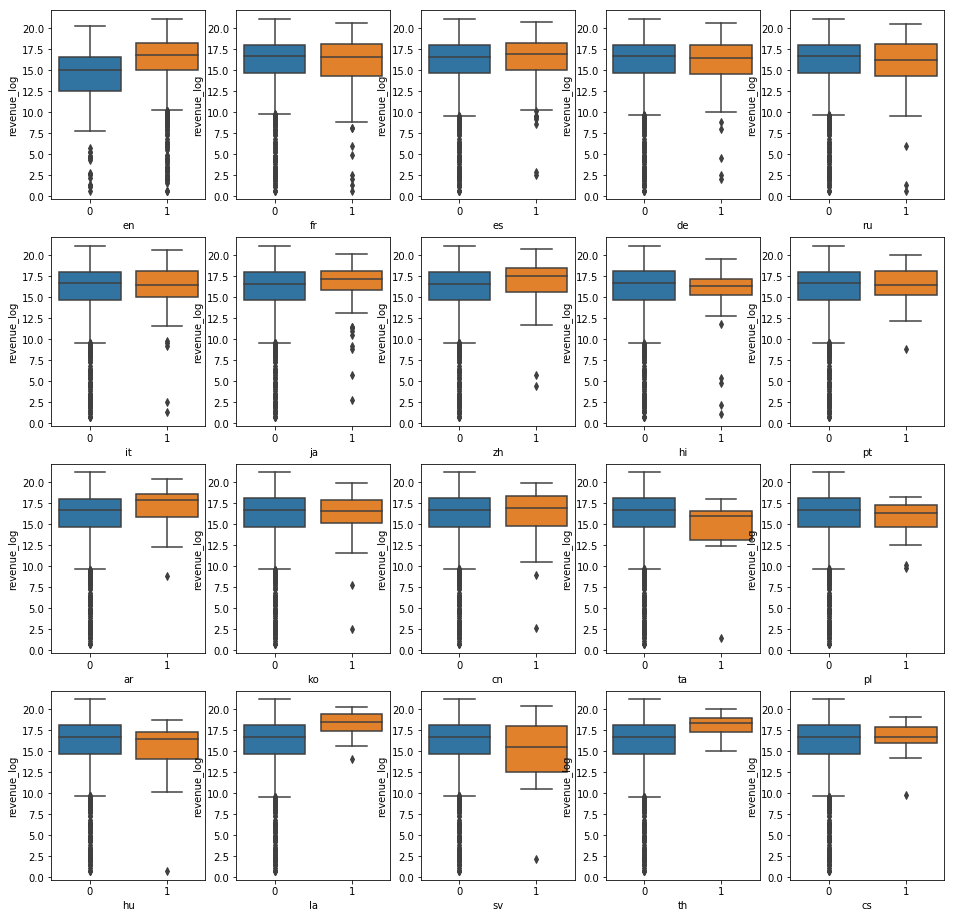

In [35]:
# 10 most frequently spoken languages
plt.figure(figsize = (16, 16))
for i in range(len(top20_langs)):
    a = top20_langs[i]
    plt.subplot(4, 5, i+1)
    sns.boxplot(x = df_langs.loc[:, a], y = df_langs.revenue_log)
plt.show()

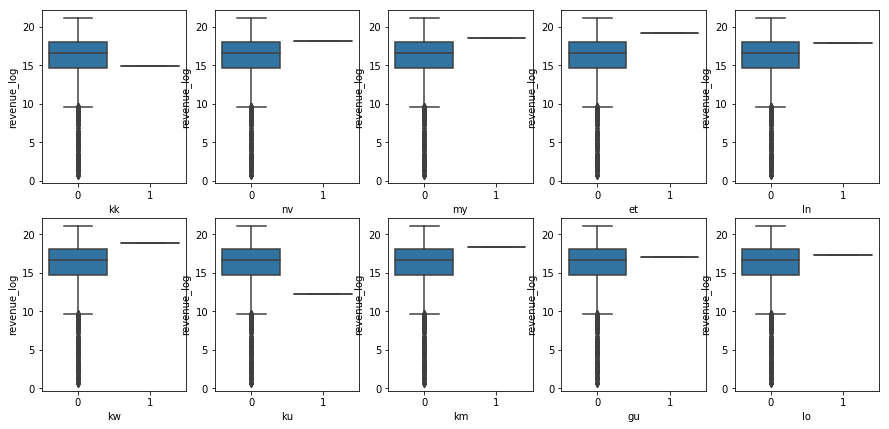

In [36]:
# 10 least frequently spoken languages
plt.figure(figsize = (15, 7))
for i in range(len(btm10_langs)):
    a = btm10_langs[i]
    plt.subplot(2, 5, i+1)
    sns.boxplot(x = df_langs.loc[:, a], y = df_langs.revenue_log)
plt.show()
# Too little data... not gonna use it

In [37]:
# Most common original langauges
lang_top15 = tr_cat.original_language.value_counts().head(15)
lang_top15

en    2575
fr      78
ru      47
es      43
hi      42
ja      37
it      24
cn      20
ko      20
zh      19
de      18
ta      16
sv       8
pt       6
nl       6
Name: original_language, dtype: int64

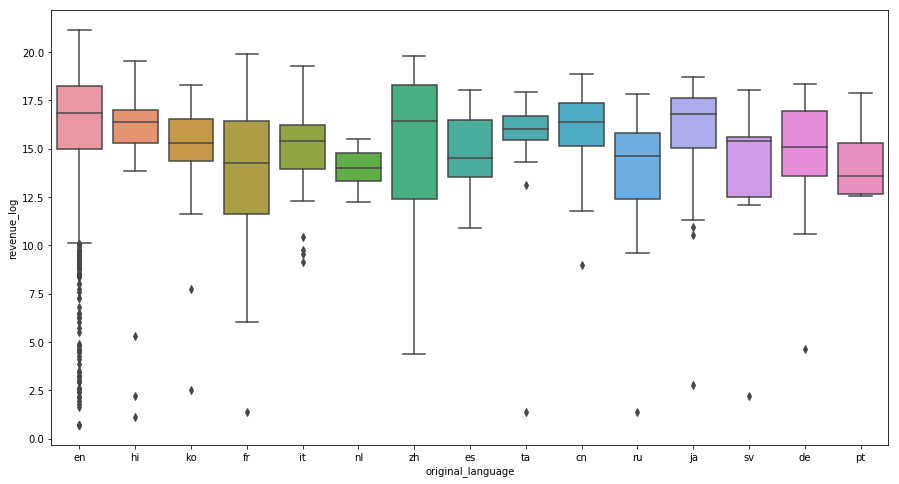

In [38]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = 'original_language', y = 'revenue_log', data = tr_cat[tr_cat.original_language.isin(lang_top15.index)])

In [44]:
# mean encoding for each original language
lang_avg = tr_cat.groupby(tr_cat.original_language)['revenue_log'].mean()

### production_companies

In [45]:
print("Min : {}, Max : {}".format(tr_cat.n_prod_comp.min(), tr_cat.n_prod_comp.max()))

Min : 0, Max : 17


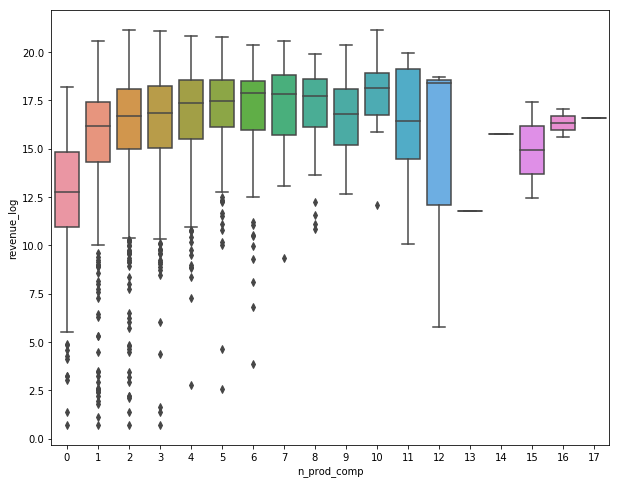

In [46]:
plt.figure(figsize = (10, 8))
sns.boxplot(tr_cat.n_prod_comp, tr_cat.revenue_log)

In [47]:
tr_cat.groupby(tr_cat.n_prod_comp)['revenue_log'].mean()

n_prod_comp
0     12.469561
1     15.498182
2     16.099513
3     16.245040
4     16.704832
5     16.962448
6     16.809689
7     17.197220
8     16.923155
9     16.698257
10    17.502369
11    16.229122
12    14.275258
13    11.747713
14    15.741342
15    14.910898
16    16.334977
17    16.566377
Name: revenue_log, dtype: float64

In [48]:
# production companies missing values
tr_cat.production_companies.head()

0    Paramount Pictures;United Artists;Metro-Goldwy...
1                                Walt Disney Pictures;
2    Bold Films;Blumhouse Productions;Right of Way ...
3                                                  NaN
4                                                  NaN
Name: production_companies, dtype: object

In [49]:
tr_cat.production_companies.isnull().sum()

156

In [50]:
# production companies vs revenue_log

### is_collection

C:\Users\jjone\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



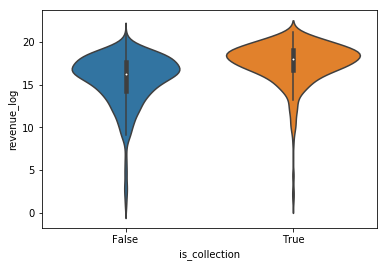

In [51]:
sns.violinplot(tr_cat.is_collection, tr_cat.revenue_log)

In [52]:
tr_cat.groupby(tr_cat.is_collection)['revenue_log'].mean()

is_collection
False    15.567722
True     17.525986
Name: revenue_log, dtype: float64

### status

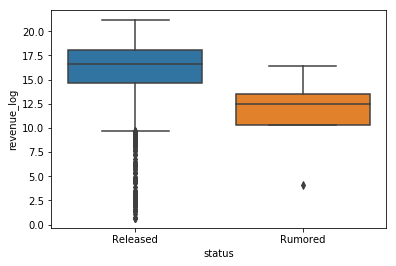

In [53]:
sns.boxplot(tr_cat.status, tr_cat.revenue_log)

In [54]:
tr_cat.groupby(tr_cat.status)['revenue_log'].mean()

status
Released    15.968149
Rumored     11.346014
Name: revenue_log, dtype: float64

### release date

In [55]:
print('revenue range from {} to {}'.format(tr_cat.release_date.min(), tr_cat.release_date.max()))

revenue range from 1921-01-21 to 2017-07-20


In [56]:
tr_cat['year_avg'] = tr_cat.groupby(['year'])['revenue_log'].transform('mean')
tr_cat['year_count'] = tr_cat.groupby('year')['revenue'].transform('count')

In [57]:
tr_cat2 = tr_cat.set_index('release_date').sort_index()
tr_cat2.head()

,genres,original_language,production_companies,production_countries,revenue,spoken_languages,status,is_collection,is_homepage,n_genres,...,n_crew,n_crew_job,year,month,day,weekofday,quarter,revenue_log,year_avg,year_count
release_date,,,,,,,,,,,,,,,,,,,,,
1921-01-21,"[Comedy, Drama]",en,Charles Chaplin Productions;First National Pic...,[US],2500000.0,"[xx, ]",Released,False,False,2,...,12,11,1921,1,21,4,1,14.731802,14.731802,1
1924-03-18,"[Action, Adventure, Drama, Family, Fantasy]",en,Douglas Fairbanks Pictures;,[US],1213880.0,"[xx, ]",Released,False,False,5,...,28,26,1924,3,18,1,1,14.009333,14.009333,1
1925-08-26,"[Romance, Drama]",en,Metro-Goldwyn-Mayer (MGM);An Erich von Strohei...,[US],1.0,"[en, ]",Released,False,False,2,...,17,9,1925,8,26,2,3,0.693147,5.704903,2
1925-12-24,"[Drama, History]",ru,Goskino Productions;Mosfilm;,[RU],45100.0,"[ru, ]",Released,False,False,2,...,20,13,1925,12,24,3,4,10.716660,5.704903,2
1926-05-14,[Drama],en,Pickford Corporation;,[US],966878.0,"[en, ]",Released,False,False,1,...,5,4,1926,5,14,4,2,13.781829,13.781829,1


In [58]:
trace_1 = go.Scatter(x = tr_cat2.index, y= tr_cat2.revenue_log, 
                     mode = 'lines', name = 'revenue', 
                    opacity = .5)
trace_2 = go.Scatter(x = tr_cat2.index, y = tr_cat2.year_avg, 
                     mode = 'lines', name = 'average revenue')
layout = go.Layout(title = 'Revenue per year',
                   xaxis = dict(title = 'time'), 
                   yaxis = dict(title = 'revenue_log'))
fig = go.Figure([trace_1, trace_2], layout)
iplot(fig)

In [59]:
trace_1 = go.Scatter(x = tr_cat2.index, y = tr_cat2.year_count, 
                     mode = 'lines', name = 'movie counts')
trace_2 = go.Scatter(x = tr_cat2.index, y = tr_cat2.year_avg, 
                    mode = 'lines', name = 'average revenue', 
                    yaxis = 'y2')
layout = go.Layout(title = '# of movies per year', 
                  xaxis = dict(title = 'time'), 
                  yaxis = dict(title = 'count'), 
                  yaxis2 = dict(title = 'avg_revenue', 
                                overlaying = 'y', side = 'right'))
fig = go.Figure([trace_1, trace_2], layout)
iplot(fig)

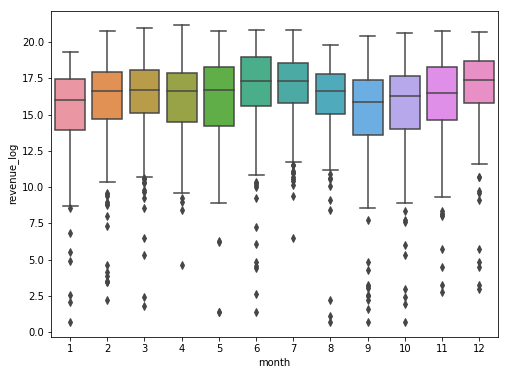

In [60]:
plt.figure(figsize = (8, 6))
sns.boxplot(x = tr_cat.month, y = tr_cat.revenue_log)

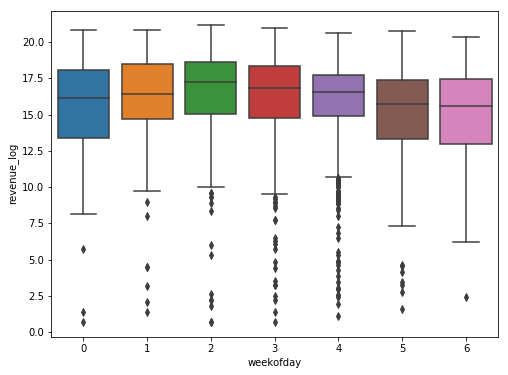

In [61]:
plt.figure(figsize = (8, 6))
sns.boxplot(x = tr_cat.weekofday, y = tr_cat.revenue_log)

### cast & crew 

C:\Users\jjone\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



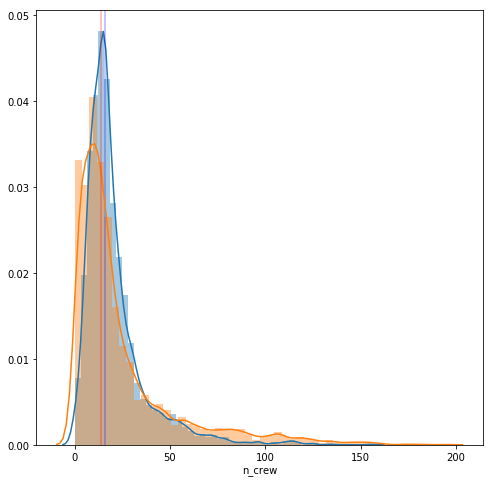

In [62]:
plt.figure(figsize = (8, 8))
sns.distplot(tr_cat.n_cast)
plt.axvline(x = tr_cat.n_cast.median(), color = 'blue', alpha = .3)

sns.distplot(tr_cat.n_crew)
plt.axvline(x = tr_cat.n_crew.median(), color = 'red', alpha = .3)

plt.show()

In [63]:
tr_cat['n_cast_log'] = np.log1p(tr_cat.n_cast)
tr_cat['n_crew_log'] = np.log1p(tr_cat.n_crew)
tr_cat['n_crew_job_log'] = np.log1p(tr_cat.n_crew_job)

C:\Users\jjone\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



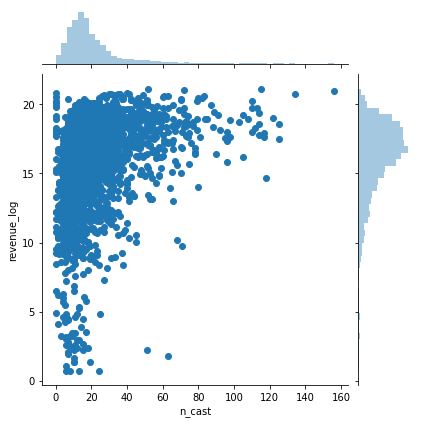

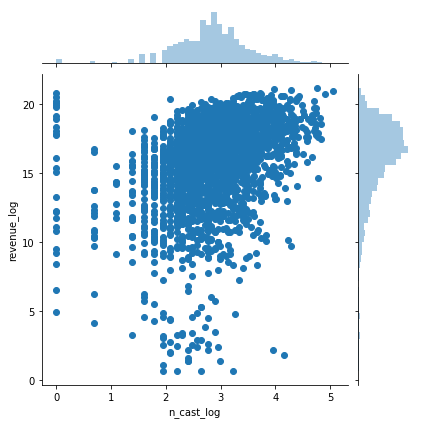

In [64]:
sns.jointplot(x = tr_cat['n_cast'], y = tr_cat.revenue_log, kind = 'scatter')
sns.jointplot(x = tr_cat['n_cast_log'], y = tr_cat.revenue_log, kind = 'scatter')

C:\Users\jjone\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



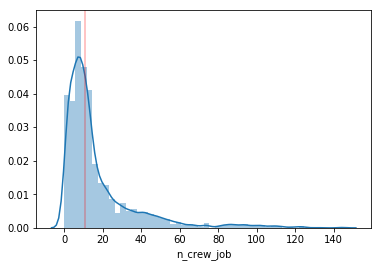

In [65]:
sns.distplot(tr_cat.n_crew_job)
plt.axvline(x = tr_cat.n_crew_job.median(), color = 'red', alpha = .3)

C:\Users\jjone\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



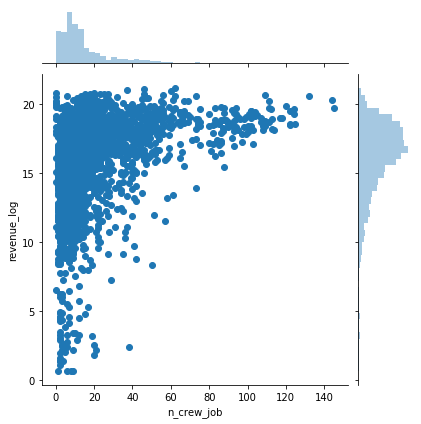

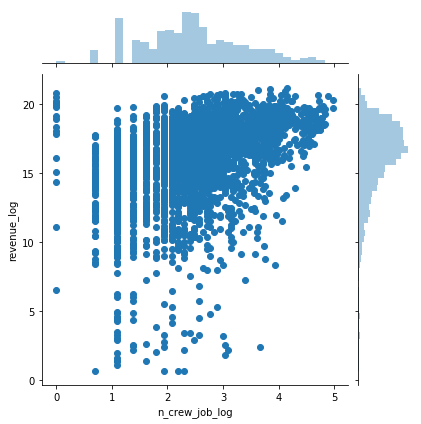

In [66]:
sns.jointplot(x = tr_cat['n_crew_job'], y = tr_cat.revenue_log, kind = 'scatter')
sns.jointplot(x = tr_cat['n_crew_job_log'], y = tr_cat.revenue_log, kind = 'scatter')

C:\Users\jjone\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



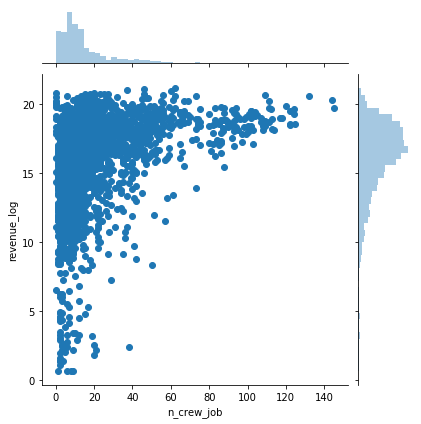

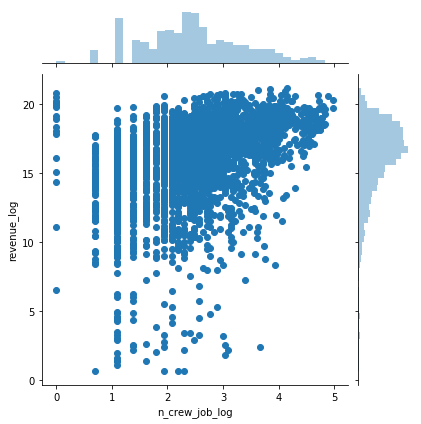

In [67]:
sns.jointplot(x = tr_cat['n_crew_job'], y = tr_cat.revenue_log, kind = 'scatter')
sns.jointplot(x = tr_cat['n_crew_job_log'], y = tr_cat.revenue_log, kind = 'scatter')